## Introduction

Analysis need to be made know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. 

-![student.jpg](attachment:student.jpg)

###  About the Dataset
1. gender : sex of students
2. race/ethnicity : ethnicity of students
3. parental level of education : parents' final education
4. lunch : having lunch before test (normal or abnormal)
5. test preparation course : complete or not complete before test

### Importing the Libraries

In [ ]:
#importing the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


.
### Reading the Dataset


In [ ]:
score_df =pd.read_csv(r"C:\Users\RMV19\Downloads\student perf.csv")
score_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Some of column names are too long, so renaming the column names to be simpler. 

In [ ]:
score_df.rename(columns={"race/ethnicity":"ethnicity",
                "parental level of education":"parent_education",
                "math score":"math","reading score":"reading","writing score":"writing",
                "test preparation course":"pre"},inplace=True)
score_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


.

**Insights:**

Column names are changed according to our convinience , 

so we can relate the datas corresponding to the columns




### Checking the Datatypes

In [ ]:
score_df.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
pre                 object
math                 int64
reading              int64
writing              int64
dtype: object

## Firstly, let's figure out the performance of each field for male and female.

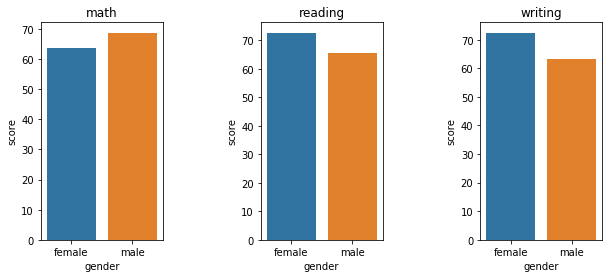

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = score_df.groupby("gender")[list(score_df.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(score_df.columns[-3:])[idx])
    
plt.show()

**Insights:**

We can see that male has better performance on math field, but worse on reading and writing.

Secondly, see the performance of ethnicity.

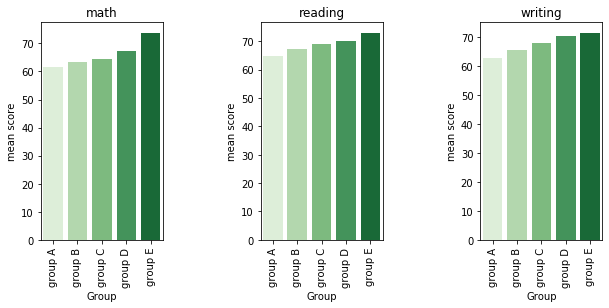

In [ ]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    ethn_df = score_df.groupby("ethnicity")[list(score_df.columns[-3:])[idx]].mean()
    sns.barplot(x=ethn_df.index, y = ethn_df.values, palette = "Greens")
    plt.xlabel("Group")
    plt.ylabel("mean score")
    plt.xticks(rotation=90)
    plt.title(list(score_df.columns[-3:])[idx])
plt.show()

**Insights:**

Obviously, group E has best performance for all the fields, and group A is the worst.

## Let's see the result of score and test preparation.  

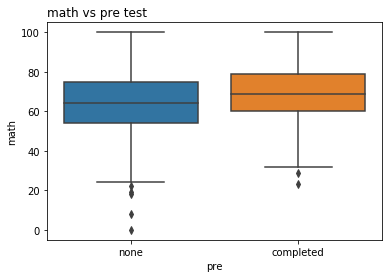

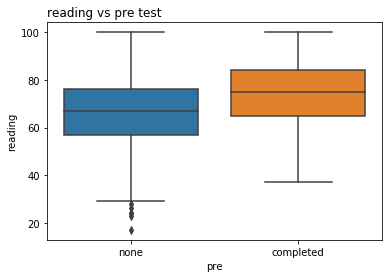

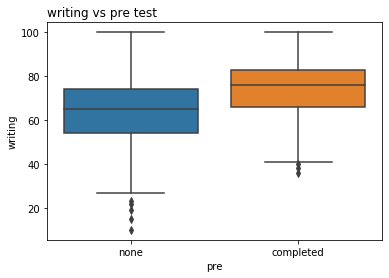

In [ ]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["pre"], y=score_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

**Insights:**

The score distribution got narrower if students complete the preparation before test,

and also we can see that the average of the score is better.


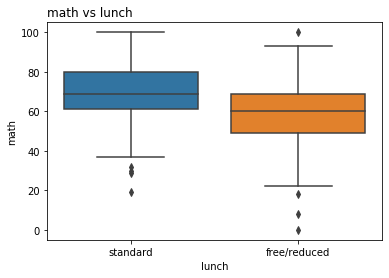

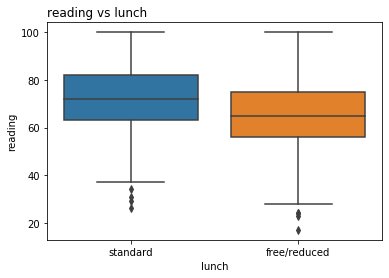

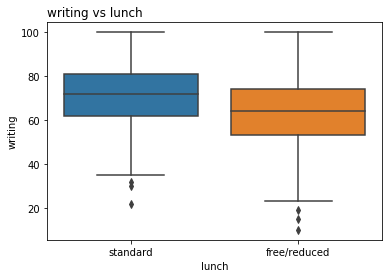

In [ ]:
for item in score_df.columns[-3:]:
    sns.boxplot(x=score_df["lunch"], y=score_df[item])
    plt.title(item+" vs lunch", loc="left")
    plt.show()

### Insights:
Students are easier to get better score once they eat standardly.

## We check the data type earily. Then we transform some features by label encoder.

In [ ]:
labelencoder = LabelEncoder()
train_df = score_df.copy()
train_df["parent_education"] = labelencoder.fit_transform(train_df["parent_education"])
train_df["pre"] = labelencoder.fit_transform(train_df["pre"])
train_df["lunch"] = labelencoder.fit_transform(train_df["lunch"])
train_df.head()

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing
0,female,group B,1,1,1,72,72,74
1,female,group C,4,1,0,69,90,88
2,female,group B,3,1,1,90,95,93
3,male,group A,0,0,1,47,57,44
4,male,group C,4,1,1,76,78,75


**Insights:**

The features "parent_education", "lunch" and "pre" are labeled by numbers.

## Using KMeans argorithm to classify the dataset.

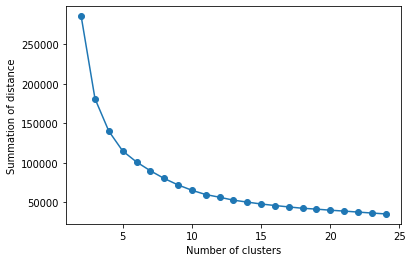

In [ ]:
kmeans_dis = list()
for idx in range(2, 25):  
    kmeans = KMeans(init = "k-means++", n_clusters = idx, n_init = 20)
    kmeans.fit_transform(train_df.iloc[:, 2:])
    kmeans_dis.append(kmeans.inertia_)
plt.plot(list(range(2,25)), kmeans_dis, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Summation of distance")
plt.show()

**Insights:**

We choose 8 as elbow point, and then classify all data. 

## Classification of the data on basis of the clusters

In [ ]:
kmeans = KMeans(init = "k-means++", n_clusters = 8)
kmeans.fit_transform(train_df.iloc[:, 2:])
kmeans_label = kmeans.labels_
score_df["classification"] = kmeans_label
score_df.head(10)

,gender,ethnicity,parent_education,lunch,pre,math,reading,writing,classification
0,female,group B,bachelor's degree,standard,none,72,72,74,4
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,3
3,male,group A,associate's degree,free/reduced,none,47,57,44,5
4,male,group C,some college,standard,none,76,78,75,1
5,female,group B,associate's degree,standard,none,71,83,78,1
6,female,group B,some college,standard,completed,88,95,92,3
7,male,group B,some college,free/reduced,none,40,43,39,2
8,male,group D,high school,free/reduced,completed,64,64,67,0
9,female,group B,high school,free/reduced,none,38,60,50,5


## After classifing the data, let's see the performance of each cluster.

In [ ]:
class_df = score_df.groupby("classification")[score_df.columns[-4:-1]].mean()
class_df

,math,reading,writing
classification,,,
0,57.729032,67.600000,67.877419
1,68.450331,78.470199,78.198675
2,32.358974,36.589744,34.025641
3,88.738636,93.318182,93.306818
4,73.471014,69.507246,67.797101
5,48.555556,52.039216,49.836601
6,62.300000,58.684615,56.807692
7,82.650685,82.328767,80.965753


# Classification of Scores of the clusters made

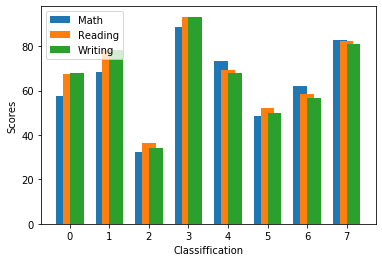

In [ ]:
ind = np.arange(8)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, class_df.math, width, label='Math')
rects2 = ax.bar(ind, class_df.reading, width, label='Reading')
rects3 = ax.bar(ind + width/2, class_df.writing, width, label='Writing')

ax.set_xlabel('Classiffication')
ax.set_ylabel('Scores')
ax.set_xticks(ind)
ax.legend()
plt.show()

In [ ]:
class_df["total_ave_score"] = (class_df.math + class_df.reading + class_df.writing)/3
rank = class_df["total_ave_score"].sort_values(ascending = False)
rank.index

Int64Index([3, 7, 1, 4, 0, 6, 5, 2], dtype='int64', name='classification')

In [ ]:
rank

classification
3    91.787879
7    81.981735
1    75.039735
4    70.258454
0    64.402151
6    59.264103
5    50.143791
2    34.324786
Name: total_ave_score, dtype: float64

For top5 rank, the average score all passed, Rank0 is the best cluster, Rank1 is second one and so on.

From now on, we can find out the correlation between the performance of students and features. Let's plot pie chart to see whether parents education level can affect the performance or not.

In [ ]:
def plot_pie_chart(column):
    fig, ax = plt.subplots(figsize=(20,16))
    color = ["orange","lightblue","green","yellow","red","pink","brown","gray"]
    for idx in range(8):
        plt.subplot(3, 3, idx+1)
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_parent_edu = num[column].value_counts()
        percentage_of_parent_edu.sort_index()
        label = percentage_of_parent_edu.index
        value = percentage_of_parent_edu.values
        plt.pie(value, labels = label, autopct = "%1.1f%%",
                startangle=90, radius = 4, colors = color[:len(label)])
        plt.axis("equal")
        plt.title("Rank "+str(idx))
    plt.show()
plot_pie_chart("parent_education")

**Insights:**

* Let's define the high degree of education. Parents having bachelor or master degree are high-level educated. So we focus on these two terms. 


* As pie chart were shown above, we can easily understand the ratio of high-degree education. For the rank0, its ratio is around 32%. In addition, there are no differences between rank1 to rank3, and the ratio are around 15~17%. Finally, the ratio is only 8% in rank7.


* We calculated the average score of each rank before, so we can say that parent's education affect the score but not obviously, because there are still 70%~80% parents without high education degree.  

## Test preparation course

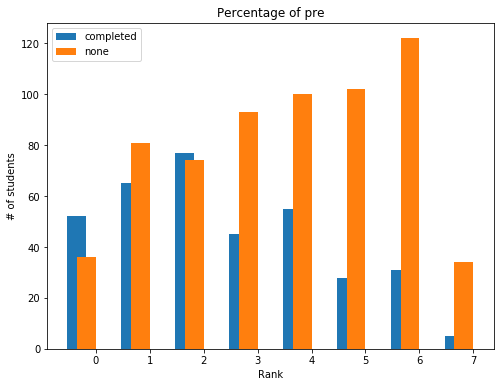

In [ ]:
def plot_bar_chart(column):
    fig, ax = plt.subplots(figsize=(8,6))
    index_dict = dict()
    width = 0.35
    ind = np.arange(8)
    for idx in range(8):
        num = "class"+ str(idx)
        num = score_df[score_df["classification"]==rank.index[idx]]
        percentage_of_column = num[column].value_counts()
        percentage_of_column = percentage_of_column.sort_index()
        for key in percentage_of_column.index:
            if key not in index_dict.keys():
                index_dict[key] = []
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
            else:
                index_dict[key].append(percentage_of_column[key]) #/percentage_of_column.values.sum())
   
    percentage_of_column = score_df[score_df["classification"]==rank.index[4]][column].value_counts().sort_index()
    for i in range(len(percentage_of_column.index)):
        rects = ax.bar(ind - width/(i+1), 
                       index_dict[percentage_of_column.index[i]],
                       width, label=percentage_of_column.index[i])

    ax.set_xlabel('Rank')
    ax.set_ylabel('# of students')
    ax.set_title("Percentage of " + column)
    ax.set_xticks(ind)
    ax.legend()
    plt.show()
    
plot_bar_chart("pre") 

**Insights:**
* Over 50% of students in rank0 completed the test preparation course, and normally 
  
  there is about 70~80% students in rank7 hadn't finished course. 
* It is say that preparation course can help students get better score.

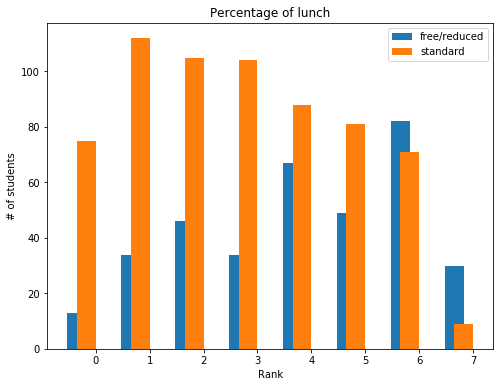

In [ ]:
plot_bar_chart("lunch")

**Insights:**

Also the same trend as "pre". Students who had lunch before test got better score. 

That is, it's hard to get good performance without eating. 

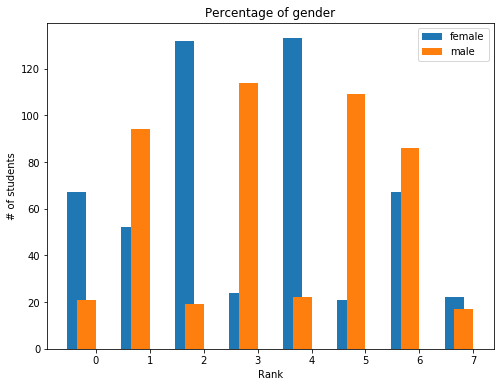

In [ ]:
plot_bar_chart("gender")

**Insights:**

* It's hard to say that the male is better than female.
* Females have a better average score also there are more females than 

## Conclusion

**There are few conclusions below:**
1. Parents' education level may affect the performance of students, but not the important one.
2. Finishing preparation course is benefitial. 
3. Having lunch is important to students, and it is also the most significant   one.
4. Gender has no correlation with the score.

**In summary, if students want to have good performance, they should have enough nutrient and make effort to prepare the test.**  